In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
df=pd.read_csv('D:\\DataFlair\\news.csv') 
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [3]:
df.shape

(6335, 4)

In [4]:
for key,count in df.label.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{df.shape[0]}")

REAL:	3171
FAKE:	3164
Total Records:	6335


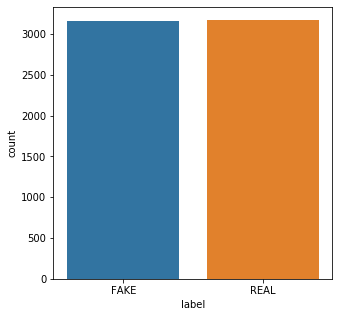

In [5]:
plt.figure(figsize=(5,5))
sns.countplot("label", data=df)
plt.show()

In [6]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [7]:
labels=df.label

In [8]:
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [9]:
x_train,x_test,y_train,y_test=train_test_split(df['text'],labels, test_size=0.2, random_state=7)

In [10]:
x_train

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
                              ...                        
5699                                                     
2550    It’s not that Americans won’t elect wealthy pr...
537     Anyone writing sentences like ‘nevertheless fu...
1220    More Catholics are in Congress than ever befor...
4271    It was hosted by CNN, and the presentation was...
Name: text, Length: 5068, dtype: object

In [11]:
x_train.shape

(5068,)

In [12]:
x_test

3534    A day after the candidates squared off in a fi...
6265    VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123    It's debate season, where social media has bro...
3940    Mitch McConnell has decided to wager the Repub...
2856    Donald Trump, the actual Republican candidate ...
                              ...                        
4986    Washington (CNN) President Barack Obama announ...
5789    The revival of middle-class jobs has been one ...
4338    "I can guarantee that," Obama answered when as...
5924    Videos 30 Civilians Die In US Airstrike Called...
6030    The retired neurosurgeon lashed out Friday mor...
Name: text, Length: 1267, dtype: object

In [13]:
x_test.shape

(1267,)

In [14]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.2)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [15]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

Accuracy: 92.9%


array([[593,  45],
       [ 45, 584]], dtype=int64)

In [16]:
nb=MultinomialNB()
nb.fit(tfidf_train,y_train)
y_pred=nb.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 84.85%


In [17]:
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[462, 176],
       [ 16, 613]], dtype=int64)